<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_06_Scalping_usando_la_estrategia_de_price_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Scalping Price Action


<br>

* Scalping: operación basada en negociaciones a corto plazo
* RSI: el indicador que mide los niveles de sobrecompra y sobreventa


💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español

In [1]:
!pip install yfinance
!pip install  --upgrade mplfinance
!pip install ta

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta
import warnings
warnings.filterwarnings("ignore")

In [3]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams['figure.figsize'] = [20, 8]

# Importar los datos

In [4]:
# Importar los precios de las acciones de Yahoo Finanzas
df = yf.download("EURUSD=X", start="2018-01-01")

# Creamos una columna de fecha para dibujar el Candlestick más tarde (no es obligatorio si no quieres representarlo)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

# Cambiar el nombre de las columnas
df.columns = ["open", "high", "low", "close", "adj close", "volume", "date"]
df.index.name = "time"
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date
time,,,,,,,
2018-01-01,1.200495,1.201504,1.199904,1.200495,1.200495,0,17532.0
2018-01-02,1.201086,1.208094,1.200855,1.201158,1.201158,0,17533.0
2018-01-03,1.206200,1.206709,1.200495,1.206345,1.206345,0,17534.0
2018-01-04,1.201129,1.209190,1.200495,1.201043,1.201043,0,17535.0
2018-01-05,1.206622,1.208459,1.202154,1.206884,1.206884,0,17536.0
...,...,...,...,...,...,...,...
2022-09-08,0.999570,1.002908,0.993345,0.999570,0.999570,0,19243.0
2022-09-09,1.001202,1.011225,1.000931,1.001202,1.001202,0,19244.0
2022-09-12,1.007141,1.019680,1.006472,1.007141,1.007141,0,19247.0


# Creación del Soporte y la Resistencia

In [5]:
# Creamos Columnas Vacías 
df["support"] = np.nan
df["resistance"] = np.nan

# Después de 5 descensos consecutivos del mínimo, anotamos este precio como el soporte
df.loc[(df["low"].shift(5) > df["low"].shift(4))&
       (df["low"].shift(4) > df["low"].shift(3))&
       (df["low"].shift(3) > df["low"].shift(2))&
       (df["low"].shift(2) > df["low"].shift(1))&
       (df["low"].shift(1) > df["low"].shift(0)), "support"] = df["low"]


# Después de 5 subidas consecutivas del máximo, observamos este precio como la resistencia
df.loc[(df["high"].shift(5) < df["high"].shift(4)) &
(df["high"].shift(4) < df["high"].shift(3)) &
(df["high"].shift(3) < df["high"].shift(2)) &
(df["high"].shift(2) < df["high"].shift(1)) &
(df["high"].shift(1) < df["high"].shift(0)), "resistance"] = df["high"]

In [6]:
df

,open,high,low,close,adj close,volume,date,support,resistance
time,,,,,,,,,
2018-01-01,1.200495,1.201504,1.199904,1.200495,1.200495,0,17532.0,NaN,NaN
2018-01-02,1.201086,1.208094,1.200855,1.201158,1.201158,0,17533.0,NaN,NaN
2018-01-03,1.206200,1.206709,1.200495,1.206345,1.206345,0,17534.0,NaN,NaN
2018-01-04,1.201129,1.209190,1.200495,1.201043,1.201043,0,17535.0,NaN,NaN
2018-01-05,1.206622,1.208459,1.202154,1.206884,1.206884,0,17536.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-08,0.999570,1.002908,0.993345,0.999570,0.999570,0,19243.0,NaN,NaN
2022-09-09,1.001202,1.011225,1.000931,1.001202,1.001202,0,19244.0,NaN,NaN
2022-09-12,1.007141,1.019680,1.006472,1.007141,1.007141,0,19247.0,NaN,NaN


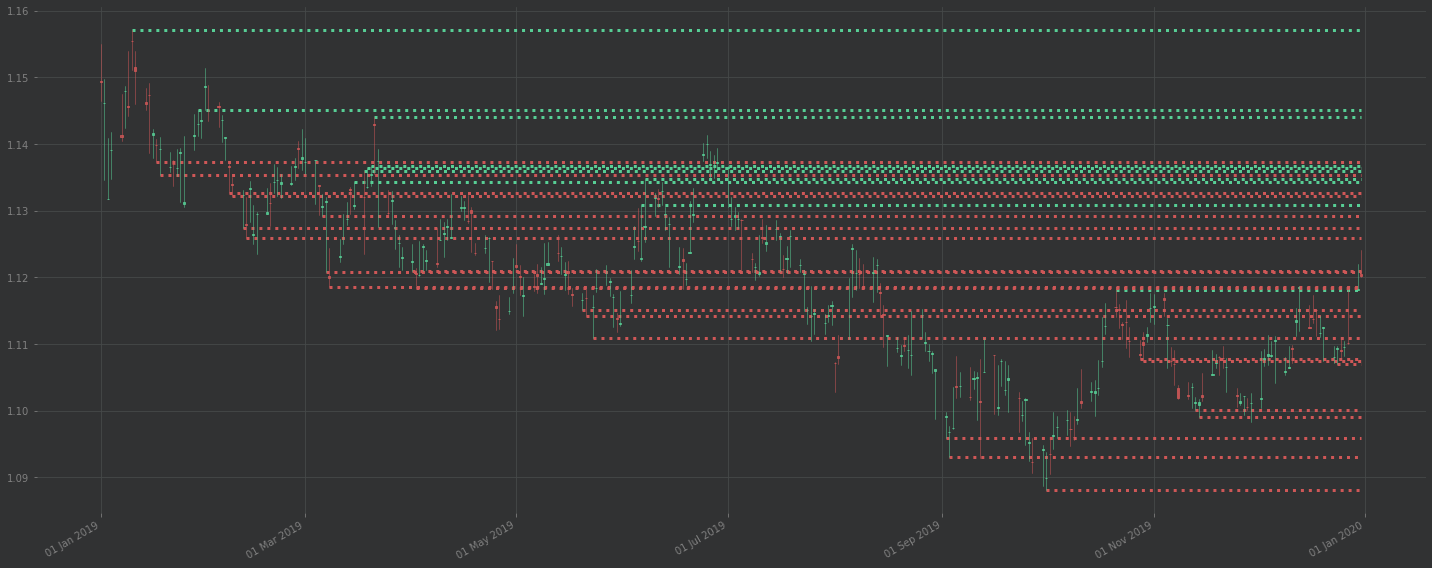

In [7]:
df_bis = df.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Dibujar el candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
for resistance, date in zip(df_bis["resistance"].dropna(), df_bis["resistance"].dropna().index):
  plt.hlines(resistance, xmin=date, xmax=df_bis.index[-1], colors='#57CE95', linestyles=":", linewidth=3)

# Representar líneas de soporte
for support, date in zip(df_bis["support"].dropna(), df_bis["support"].dropna().index):
  plt.hlines(support, xmin=date, xmax=df_bis.index[-1], colors='#CE5757', linestyles=":", linewidth=3)

# Representar la figura
fig.show()

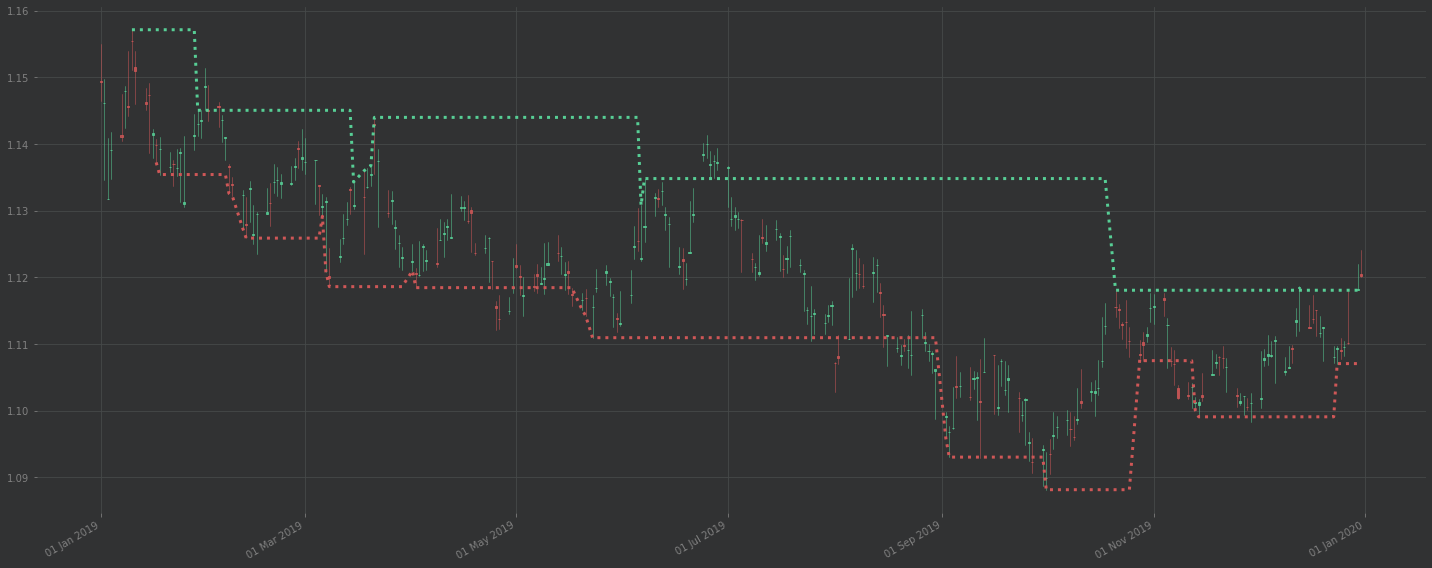

In [8]:
df = df.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Representar el candlestick
candlestick_ohlc(ax,df[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
plt.plot(df["support"].fillna(method="ffill"),color='#CE5757', linestyle=":", linewidth=3)


# Representar líneas de soporte
plt.plot(df["resistance"].fillna(method="ffill"),color='#57CE95', linestyle=":", linewidth=3)

# Mostrar la figura
fig.show()

# Estrategia de Soporte y Estrategia

In [9]:
# Crear la señal
df["signal"] = 0

# Suavizar el soporte y la resistencia para crear la estrategia
df["smooth resistance"] = df["resistance"].fillna(method="ffill")
df["smooth support"] = df["support"].fillna(method="ffill")

# Crear condiciones de compra
condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) &\
                   (df["smooth resistance"]*(1+0.0/100)<df["close"])

# Crear condiciones de venta
condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) &\
                   (df["smooth support"]*(1-0.0/100)>df["close"])


# Colocar la señal
df.loc[condition_1_buy, "signal"] = 1
df.loc[condition_1_sell, "signal"] = -1

<AxesSubplot:xlabel='time'>

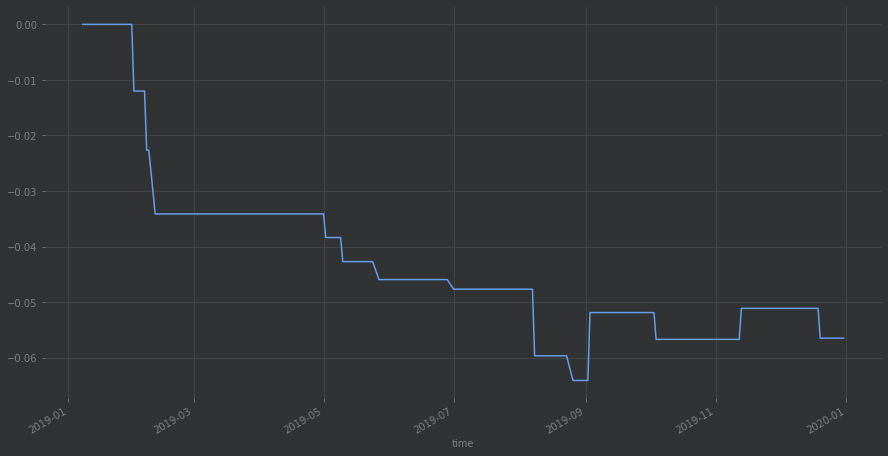

In [10]:
duration = 5

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))


df["return"].cumsum().plot(figsize=(15,8))

# Soporte y Resistencia + SMA

<AxesSubplot:xlabel='time'>

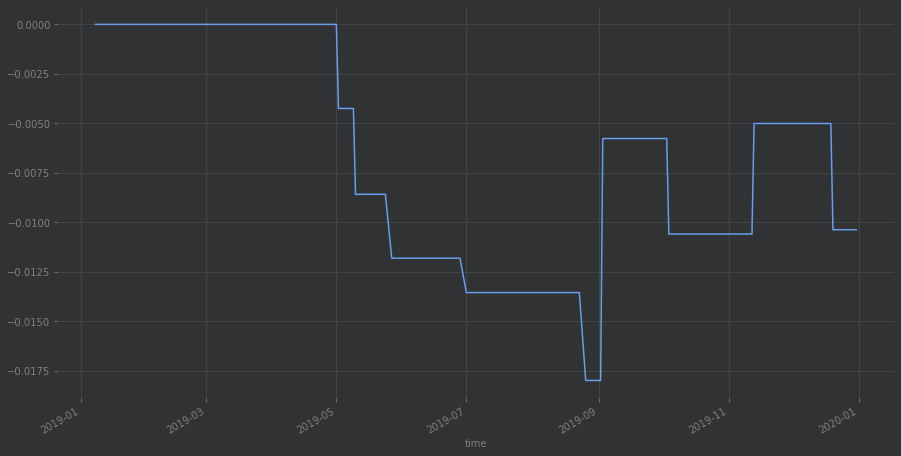

In [11]:
# Crear media móvil simple de 30 días
df["SMA fast"] = df["close"].rolling(30).mean()

# Crear media móvil simple de 60 días
df["SMA slow"] = df["close"].rolling(60).mean()

condition_2_buy = df["SMA fast"] > df["SMA slow"]
condition_2_sell = df["SMA fast"] < df["SMA slow"]



df["signal"] = 0

df.loc[condition_1_buy & condition_2_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell, "signal"] = -1


# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

df["return"].cumsum().plot(figsize=(15,8))

# Soporte y Resistencia + SMA + RSI

<AxesSubplot:xlabel='time'>

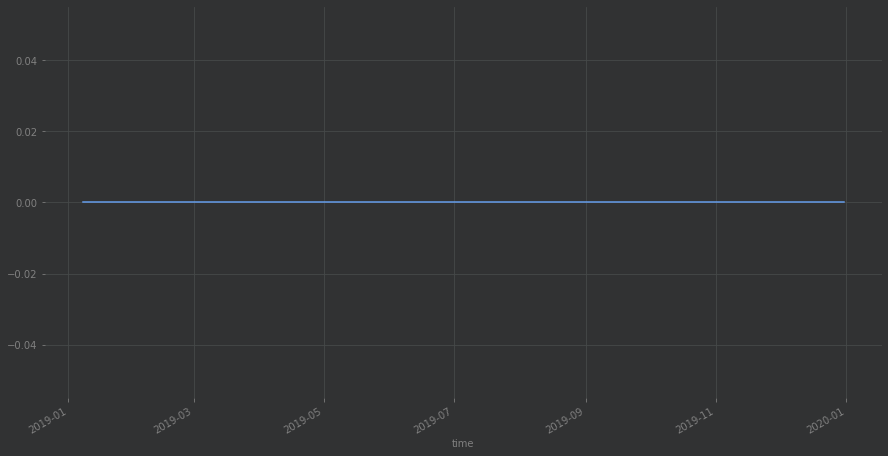

In [12]:
df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

# RSI de ayer
df["rsi yersteday"] = df["rsi"].shift(1)

df["signal"] = 0
condition_3_buy = df["rsi"] < df["rsi yersteday"]

condition_3_sell = df["rsi"] > df["rsi yersteday"]



df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1


# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

df["return"].cumsum().plot(figsize=(15,8))

# Automatizar el proceso

In [13]:
def support_resistance(df, duration=5,spread=0):
  """EL DATAFRAME NECESITA TENER los siguientes nombres de columna: alta, baja, cierre"""

  # Support and resistance building
  df["support"] = np.nan
  df["resistance"] = np.nan

  df.loc[(df["low"].shift(5) > df["low"].shift(4)) &
        (df["low"].shift(4) > df["low"].shift(3)) &
        (df["low"].shift(3) > df["low"].shift(2)) &
        (df["low"].shift(2) > df["low"].shift(1)) &
        (df["low"].shift(1) > df["low"].shift(0)), "support"] = df["low"]


  df.loc[(df["high"].shift(5) < df["high"].shift(4)) &
  (df["high"].shift(4) < df["high"].shift(3)) &
  (df["high"].shift(3) < df["high"].shift(2)) &
  (df["high"].shift(2) < df["high"].shift(1)) &
  (df["high"].shift(1) < df["high"].shift(0)), "resistance"] = df["high"]


  # Create Simple moving average 30 days
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Create Simple moving average 60 days
  df["SMA slow"] = df["close"].rolling(60).mean()

  df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

  # RSI yersteday
  df["rsi yersteday"] = df["rsi"].shift(1)

  # Create the signal
  df["signal"] = 0

  df["smooth resistance"] = df["resistance"].fillna(method="ffill")
  df["smooth support"] = df["support"].fillna(method="ffill")


  condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) & \
                    (df["smooth resistance"]*(1+0.5/100) < df["close"])
  condition_2_buy = df["SMA fast"] > df["SMA slow"]

  condition_3_buy = df["rsi"] < df["rsi yersteday"]

  condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) & \
                    (df["smooth support"]*(1+0.5/100) > df["close"])
  condition_2_sell = df["SMA fast"] < df["SMA slow"]

  condition_3_sell = df["rsi"] > df["rsi yersteday"]



  df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
  df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1


  # Calculamos las ganancias
  df["pct"] = df["close"].pct_change(1)

  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))
  df.loc[df["return"]==-1, "return"] = df["return"]-spread
  df.loc[df["return"]==1, "return"] = df["return"]-spread


  return df["return"]

In [21]:
# Función de Pre Procesado

def preprocessing_min(name):

  # Import the data
  df = pd.read_csv(name , parse_dates=True, index_col=0).dropna()
  df.index.name = 'Date'
  #df.index = pd.to_datetime(df.index) 
  #df.index.name = "time"
  return df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:xlabel='time'>

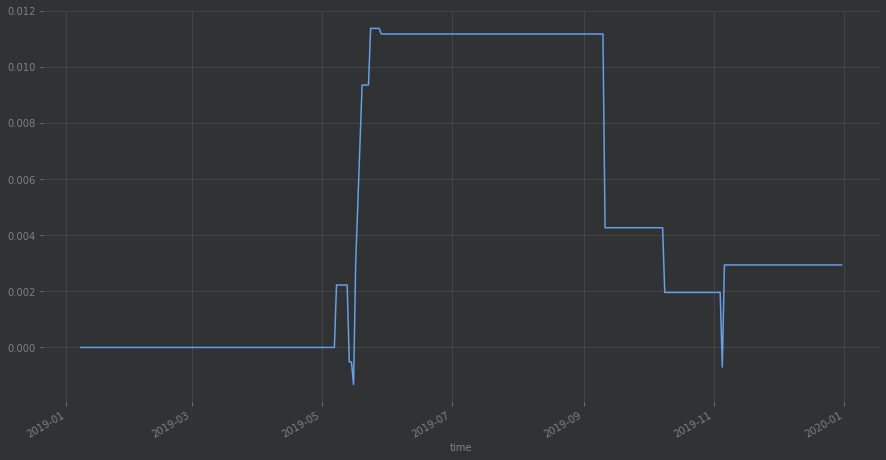

In [22]:
symbols_forex = [
    "AUDCAD=X","AUDCHF=X","AUDJPY=X","AUDNZD=X","AUDUSD=X","CADCHF=X","CADJPY=X",
    "CHFJPY=X","EURAUD=X","EURCAD=X","EURCHF=X","EURGBP=X","EURJPY=X","EURNZD=X",
    "EURUSD=X","GBPAUD=X","GBPCAD=X","GBPCHF=X","GBPJPY=X","GBPNZD=X","GBPUSD=X",
    "NZDCAD=X","NZDCHF=X","NZDJPY=X","NZDUSD=X","USDCAD=X","USDCHF=X","USDJPY=X",
                 ]

symbols_forex_winners = [
    "AUDCAD=X","AUDCHF=X","AUDNZD=X","AUDUSD=X","CADCHF=X","CADJPY=X",
    "GBPCAD=X","GBPCHF=X","GBPJPY=X","GBPUSD=X",
    "NZDCAD=X","USDCHF=X"
                 ]

symbols_indices = [
    '^NDX', '^GSPC', '^IBEX', 
]

symbols_commodities = [
    'GC=F', 'SI=F', 'CL=F',
]

symbols_tresuries = ['^TNX',
                     #'00774B.TW',
                     ]

symbols_crypto = [
    'BTC-USD','ETH-USD',
]

listnames = symbols_forex+symbols_indices+symbols_commodities+symbols_crypto+ symbols_tresuries
interval = '15m'
for name in listnames:
    data_m1 = yf.download(name, start='2022-07-18', interval=interval).dropna()
    data_m1.columns = ["open", "high", "low", "close", "adj close", "volume"]
    del data_m1["adj close"]
    data_m1.to_csv(f'./FOREX M1/{name}_{interval}.csv')
support_resistance(df).cumsum().plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

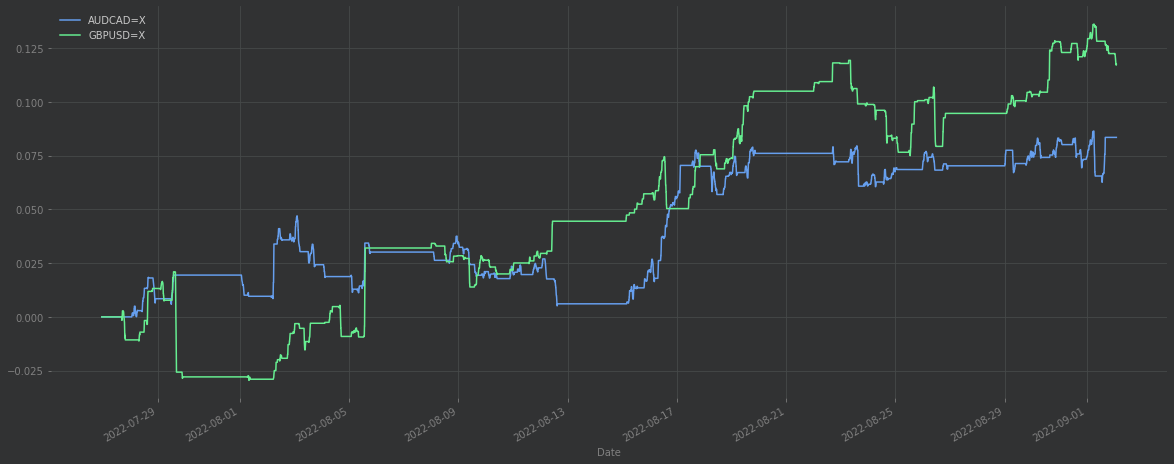

In [16]:
listnames = ['AUDCAD=X', 'GBPUSD=X'] # symbols_forex#+symbols_indices+symbols_commodities+symbols_crypto+ symbols_tresuries
interval = '5m'

# Lista de assets
returns = pd.DataFrame()

# Calcular la rentabilidad de cada estrategia
for name in listnames:
  dfc = preprocessing_min(f'./FOREX M1/{name}_{interval}.csv')
  returns[name] = support_resistance(dfc, duration=10, spread=0.1)

# Representar los resultados
returns = returns.fillna(value=0).cumsum()
returns.plot()

# Diversificar la cartera


In [17]:
returns["portfolio"] = returns.sum(axis=1)/returns.shape[1]

In [18]:
def drawdown_function(serie):

  # Calculamos la suma de los rendimientos
  cum = serie.dropna().cumsum() + 1

  # Calculamos el máximo de la suma en el período (acumulamos el máximo) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # Calculamos el drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [19]:
# Dataframe vacío
values = pd.DataFrame(index=["BENEFICIO (%)", "DRAWDOWN (%)", "RETURN DRAWDOWN RATIO", "NUMBER OF OPERATIONS"])

# Calculamos retorno/drawdown
for col in returns.columns:
  ret = (returns[col].dropna().iloc[-1])*100
  dd = -np.min(drawdown_function(returns[col].dropna()))
  ret_dd = ret/dd
  num_op = returns[col].dropna().shape[0]
  
  values[col] = ret,dd,ret_dd, num_op

values.transpose().sort_values(by="RETURN DRAWDOWN RATIO", ascending=False)

,BENEFICIO (%),DRAWDOWN (%),RETURN DRAWDOWN RATIO,NUMBER OF OPERATIONS
portfolio,10.048637,0.861963,11.657852,7681.0
GBPUSD=X,11.745015,7.498601,1.566294,7681.0
AUDCAD=X,8.352260,-0.000000,-inf,7681.0


In [20]:
returns

,AUDCAD=X,GBPUSD=X,portfolio
Date,,,
2022-07-26 23:00:00+01:00,0.000000,0.000000,0.000000
2022-07-26 23:05:00+01:00,0.000000,0.000000,0.000000
2022-07-26 23:10:00+01:00,0.000000,0.000000,0.000000
2022-07-26 23:15:00+01:00,0.000000,0.000000,0.000000
2022-07-26 23:20:00+01:00,0.000000,0.000000,0.000000
...,...,...,...
2022-09-02 01:40:00+01:00,0.083523,0.117705,0.100614
2022-09-02 01:45:00+01:00,0.083523,0.117404,0.100464
2022-09-02 01:50:00+01:00,0.083523,0.117127,0.100325
